<a href="https://colab.research.google.com/github/Devansharma/Air_Quaity_Index_Prediction/blob/master/Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Regressor

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import pickle

In [13]:
df = pd.read_csv('Real_Combine.csv')
df = df.dropna()
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [14]:
RFregressor = RandomForestRegressor()
RFregressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [15]:
print("R2(train data): {}".format(RFregressor.score(X_train, y_train)))
print("R2(test data): {}".format(RFregressor.score(X_test, y_test)))

R2(train data): 0.9731375341216115
R2(test data): 0.8147401808529854


In [16]:
score=cross_val_score(RFregressor, X, y, cv=10)
score.mean()

0.7021181724671897

In [17]:
prediction = RFregressor.predict(X_test)

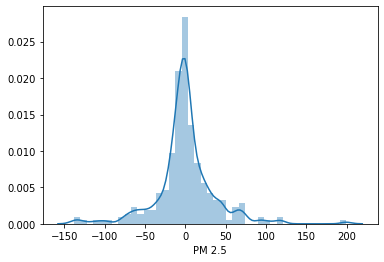

In [18]:
sns.distplot(y_test-prediction)

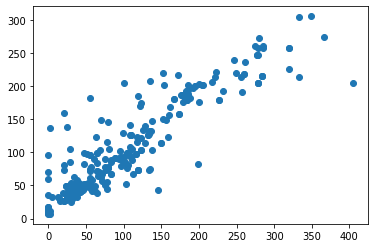

In [19]:
plt.scatter(y_test, prediction)

In [28]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [29]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [30]:
rf = RandomForestRegressor()

In [31]:
%%time
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

CPU times: user 27 µs, sys: 0 ns, total: 27 µs
Wall time: 30.5 µs


In [ ]:
rf_random.fit(X_train,y_train)

In [33]:
rf_random.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [34]:
rf_random.best_score_

-1465.158125383373

In [35]:
predictions = rf_random.predict(X_test)

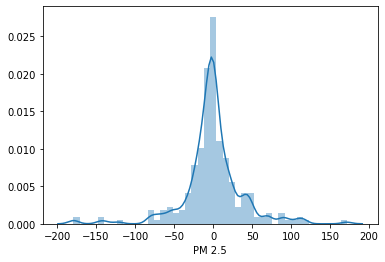

In [36]:
sns.distplot(y_test-predictions)

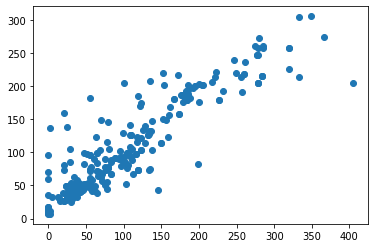

In [37]:
plt.scatter(y_test,prediction)

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 23.959376671177985
MSE: 1513.8650527415261
RMSE: 38.90841879004499


In [41]:
file = open('random_forest_regression_model.pkl', 'wb')
pickle.dump(rf_random, file)